## Making a Pump Efficiency predictor using the dataset provided my college Proffesor

In [1]:
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt



In [4]:
df1 = pd.read_excel("~/DATA Sets/DIRECT (27TH FEB).xlsx",engine='openpyxl')

In [5]:
df1.head()

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),flow in m3/s,E h(instantaneous),PRESSURE(kg/cm2),Power(VI),Ep(instantaneous),Ep,int insolation,flow in m3/sec,inTQ,ηp(instantaneous),ηsys(instantaneous)
0,08:00:00,90.0,117.36,16.374067,0.18,3.08,0.0,0.0,0.0,0.3,0.5544,0.5544,0.048512,10.323333,0.133750,0.458351,0.0,0.0
1,08:05:00,100.0,130.40,18.193408,0.19,3.21,0.0,0.0,0.0,0.3,0.6099,0.6099,0.052579,10.866667,0.452778,NaN,0.0,0.0
2,08:10:00,100.0,130.40,18.193408,0.20,3.26,0.0,0.0,0.0,0.3,0.6520,0.6520,0.056042,13.040000,0.000000,0.000000,0.0,0.0
3,08:15:00,140.0,182.56,25.470771,0.21,3.30,0.0,0.0,0.0,0.3,0.6930,0.6930,0.061458,15.756667,0.000000,0.000000,0.0,0.0
4,08:20:00,150.0,195.60,27.290112,0.23,3.40,0.0,0.0,0.0,0.3,0.7820,0.7820,0.066083,17.930000,0.000000,0.000000,0.0,0.0


In [6]:
df1.shape

(108, 18)

In [7]:
df2 = pd.read_excel("~/DATA Sets/DIRECT(22TH FEB).xlsx",engine='openpyxl')

In [2]:
df3 = pd.read_excel("~/DATA Sets/HYBRID(21ST FEB).xlsx",engine='openpyxl')

In [9]:
df3.head()

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),FLOW IN M3,E h(instantaneous),PRESSURE(kg/cm2),Power(VI),Ep,Ep(instantaneous),Int Q,Int Insolation,ηp (instantaneous),ηsys(instantaneous),Unnamed: 17,Unnamed: 18,Unnamed: 19
0,08:00:00,185.0,241.24,33.657805,0.98,11.60,285.0,0.000079,2.3275,0.3,11.3680,0.935267,11.3680,0.000007,20.103333,0.204741,0.069152,NaN,NaN,NaN
1,08:05:00,185.0,241.24,33.657805,0.96,11.54,285.0,0.000079,2.3275,0.3,11.0784,0.916017,11.0784,0.000007,20.375000,0.210094,0.069152,NaN,NaN,NaN
2,08:10:00,190.0,247.76,34.567475,0.95,11.48,285.0,0.000079,2.3275,0.3,10.9060,0.902875,10.9060,0.000007,20.918333,0.213415,0.067332,NaN,NaN,NaN
3,08:15:00,195.0,254.28,35.477146,0.94,11.45,285.0,0.000079,2.3275,0.3,10.7630,0.891371,10.7630,0.000007,20.918333,0.216250,0.065606,NaN,NaN,NaN
4,08:20:00,190.0,247.76,34.567475,0.93,11.43,285.0,0.000079,2.3275,0.3,10.6299,0.879913,10.6299,0.000007,21.461667,0.218958,0.067332,NaN,NaN,NaN


In [10]:
df4 = pd.read_excel("~/DATA Sets/WITH BATTERY (20TH FEB).xlsx",engine='openpyxl')

In [11]:
df4.shape


(103, 20)

In [12]:
df4.head()

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),lfow in m3/sec,E h(instantaneous),PRESSURE(kg/cm2),Power(VI),Ep,Ep(instantaneous),Int Q,INT INSOLATION,ηp (instantaneous),ηsys(instantaneous),Unnamed: 17,Unnamed: 18,Unnamed: 19
0,08:00:00,80.0,104.32,14.554726,0.99,11.79,295.0,0.000082,2.409167,0.3,11.6721,11.47105,11.47105,0.000007,9.508333,0.210021,0.165525,NaN,NaN,NaN
1,08:05:00,95.0,123.88,17.283738,0.98,11.50,295.0,0.000082,2.409167,0.3,11.2700,11.22590,11.22590,0.000007,10.051667,0.214608,0.139389,NaN,NaN,NaN
2,08:10:00,90.0,117.36,16.374067,0.98,11.41,295.0,0.000082,2.409167,0.3,11.1818,11.16220,11.16220,0.000007,9.508333,0.215833,0.147133,NaN,NaN,NaN
3,08:15:00,85.0,110.84,15.464397,0.98,11.37,295.0,0.000082,2.409167,0.3,11.1426,11.06150,11.06150,0.000007,9.780000,0.217797,0.155788,NaN,NaN,NaN
4,08:20:00,95.0,123.88,17.283738,0.97,11.32,280.0,0.000078,2.286667,0.3,10.9804,10.89980,10.89980,0.000006,10.595000,0.209790,0.132302,NaN,NaN,NaN


In [13]:
df5 = pd.read_excel("~/DATA Sets/WITH SC(23RD FEB).xlsx",engine='openpyxl')

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TIME                 86 non-null     object 
 1   Isc( ma)             86 non-null     float64
 2   Insolation           86 non-null     float64
 3   E(instantaneous)     86 non-null     float64
 4   Ip(amps)             86 non-null     float64
 5   Vp(volt)             86 non-null     float64
 6   Q(flow)              86 non-null     float64
 7   FLOW IN M3           86 non-null     float64
 8   E h(instantaneous)   86 non-null     float64
 9   PRESSURE(kg/cm2)     86 non-null     float64
 10  Power(VI)            86 non-null     float64
 11  Ep                   87 non-null     float64
 12  Ep(instantaneous)    87 non-null     float64
 13  Int Q                87 non-null     float64
 14  Int Insolation       87 non-null     float64
 15  ηp (instantaneous)   86 non-null     float

In [4]:
df3.columns

Index(['TIME', 'Isc( ma)', 'Insolation', 'E(instantaneous)', 'Ip(amps)',
       'Vp(volt)', 'Q(flow)', 'FLOW IN M3', 'E h(instantaneous)',
       'PRESSURE(kg/cm2)', 'Power(VI)', 'Ep', 'Ep(instantaneous)', 'Int Q',
       'Int Insolation', 'ηp (instantaneous)', 'ηsys(instantaneous)',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

#### TIME	Timestamp of the measurement
#### Isc (ma)	Short circuit current from the solar panel in milliamps
#### Insolation	Solar radiation incident on the surface (W/m² or similar)
#### E (instantaneous)	Instantaneous energy generation (possibly in joules or watt-seconds)
#### Ip (amps)	Current output from the solar panel (load current)
#### Vp (volt)	Voltage output from the solar panel
#### Q (flow)	Instantaneous fluid flow rate (likely in L/s or m³/s)
#### FLOW IN M3	Cumulative volume of fluid pumped (in cubic meters)
#### E h (instantaneous)	Possibly hydraulic energy at that moment
#### PRESSURE (kg/cm²)	Water pressure at the outlet of the pump
#### Power (VI)	Electrical power input to the pump (Voltage × Current)
#### Ep	Energy output of the pump (possibly cumulative)
#### Ep (instantaneous)	Instantaneous energy output
#### Int Q	Integrated (cumulative) flow over time
#### Int Insolation	Integrated solar insolation over time
#### ηp (instantaneous)	Instantaneous pump efficiency = Output Power / Input Power
#### ηsys (instantaneous)	Instantaneous system efficiency (solar-to-water system)

In [5]:
df3 = df3.drop(columns=["Unnamed: 17",'Unnamed: 18','Unnamed: 19'],axis=1)

In [6]:
df3.head()

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),FLOW IN M3,E h(instantaneous),PRESSURE(kg/cm2),Power(VI),Ep,Ep(instantaneous),Int Q,Int Insolation,ηp (instantaneous),ηsys(instantaneous)
0,08:00:00,185.0,241.24,33.657805,0.98,11.60,285.0,0.000079,2.3275,0.3,11.3680,0.935267,11.3680,0.000007,20.103333,0.204741,0.069152
1,08:05:00,185.0,241.24,33.657805,0.96,11.54,285.0,0.000079,2.3275,0.3,11.0784,0.916017,11.0784,0.000007,20.375000,0.210094,0.069152
2,08:10:00,190.0,247.76,34.567475,0.95,11.48,285.0,0.000079,2.3275,0.3,10.9060,0.902875,10.9060,0.000007,20.918333,0.213415,0.067332
3,08:15:00,195.0,254.28,35.477146,0.94,11.45,285.0,0.000079,2.3275,0.3,10.7630,0.891371,10.7630,0.000007,20.918333,0.216250,0.065606
4,08:20:00,190.0,247.76,34.567475,0.93,11.43,285.0,0.000079,2.3275,0.3,10.6299,0.879913,10.6299,0.000007,21.461667,0.218958,0.067332


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Why using Random forest regressor algorithm?

### Random Forest is a non-linear model that doesn’t assume any fixed relationship between inputs and output — it learns patterns from the data directly.



In [8]:
df3=df3.dropna()

In [9]:
df3['TIME'] = pd.to_datetime(df3['TIME'], format='%H:%M:%S')
df3['hour'] = df3['TIME'].dt.hour
df3['hour_sin'] = np.sin(2 * np.pi * df3['hour'] / 24)
df3['hour_cos'] = np.cos(2 * np.pi * df3['hour'] / 24)

In [10]:
df3

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),FLOW IN M3,E h(instantaneous),PRESSURE(kg/cm2),Power(VI),Ep,Ep(instantaneous),Int Q,Int Insolation,ηp (instantaneous),ηsys(instantaneous),hour,hour_sin,hour_cos
0,1900-01-01 08:00:00,185.0,241.24,33.657805,0.98,11.60,285.0,0.000079,2.327500,0.3,11.3680,0.935267,11.3680,0.000007,20.103333,0.204741,0.069152,8,0.866025,-0.500000
1,1900-01-01 08:05:00,185.0,241.24,33.657805,0.96,11.54,285.0,0.000079,2.327500,0.3,11.0784,0.916017,11.0784,0.000007,20.375000,0.210094,0.069152,8,0.866025,-0.500000
2,1900-01-01 08:10:00,190.0,247.76,34.567475,0.95,11.48,285.0,0.000079,2.327500,0.3,10.9060,0.902875,10.9060,0.000007,20.918333,0.213415,0.067332,8,0.866025,-0.500000
3,1900-01-01 08:15:00,195.0,254.28,35.477146,0.94,11.45,285.0,0.000079,2.327500,0.3,10.7630,0.891371,10.7630,0.000007,20.918333,0.216250,0.065606,8,0.866025,-0.500000
4,1900-01-01 08:20:00,190.0,247.76,34.567475,0.93,11.43,285.0,0.000079,2.327500,0.3,10.6299,0.879913,10.6299,0.000007,21.461667,0.218958,0.067332,8,0.866025,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1900-01-01 14:45:00,370.0,482.48,67.315610,0.85,11.70,280.0,0.000078,2.286667,0.3,9.9450,0.822825,9.9450,0.000006,39.663333,0.229931,0.033969,14,-0.500000,-0.866025
82,1900-01-01 14:50:00,360.0,469.44,65.496269,0.84,11.67,280.0,0.000078,2.286667,0.3,9.8028,0.816900,9.8028,0.000006,38.576667,0.233267,0.034913,14,-0.500000,-0.866025
83,1900-01-01 14:55:00,350.0,456.40,63.676928,0.84,11.67,280.0,0.000078,2.286667,0.3,9.8028,0.813750,9.8028,0.000006,37.490000,0.233267,0.035910,14,-0.500000,-0.866025
84,1900-01-01 15:00:00,340.0,443.36,61.857587,0.84,11.58,280.0,0.000078,2.286667,0.3,9.7272,0.803008,9.7272,0.000006,36.403333,0.235080,0.036967,15,-0.707107,-0.707107


In [11]:
df3['power_to_flow'] = df3['Power(VI)'] / (df3['Q(flow)'] + 1e-5)

In [12]:
drop_cols = ['TIME', 'ηp (instantaneous)', 'ηsys(instantaneous)', 'Ep', 'Int Q']
X = df3.drop(columns=drop_cols)
y = df3['ηp (instantaneous)']

In [14]:
y

0     0.204741
1     0.210094
2     0.213415
3     0.216250
4     0.218958
        ...   
81    0.229931
82    0.233267
83    0.233267
84    0.235080
85    0.239567
Name: ηp (instantaneous), Length: 86, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
df3.describe()

,TIME,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),FLOW IN M3,E h(instantaneous),PRESSURE(kg/cm2),...,Ep,Ep(instantaneous),Int Q,Int Insolation,ηp (instantaneous),ηsys(instantaneous),hour,hour_sin,hour_cos,power_to_flow
count,86,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1900-01-01 11:32:29.999999488,419.941860,547.604186,76.401736,0.721628,9.997442,228.720930,0.000064,1.867888,3.000000e-01,...,0.633146,7.663842,0.000005,45.516802,0.239286,0.027583,11.093023,0.203062,-0.835655,21486.074616
min,1900-01-01 08:00:00,185.000000,241.240000,33.657805,0.290000,4.820000,0.000000,0.000000,0.000000,3.000000e-01,...,0.127300,1.458700,0.000000,17.930000,0.000000,0.000000,8.000000,-0.707107,-1.000000,0.014688
25%,1900-01-01 09:46:15,370.000000,482.480000,67.315610,0.657500,9.245000,250.000000,0.000069,2.041667,3.000000e-01,...,0.478298,6.082075,0.000005,40.070833,0.227647,0.022550,9.000000,-0.258819,-0.965926,0.031963
50%,1900-01-01 11:32:30,450.000000,586.800000,81.870336,0.810000,11.125000,280.000000,0.000078,2.286667,3.000000e-01,...,0.751062,9.019350,0.000006,48.900000,0.238707,0.025650,11.000000,0.258819,-0.866025,0.034212
75%,1900-01-01 13:18:45,490.000000,638.960000,89.147699,0.850000,11.562500,280.000000,0.000078,2.286667,3.000000e-01,...,0.821932,9.851500,0.000006,53.246667,0.255505,0.034461,13.000000,0.707107,-0.707107,0.035874
max,1900-01-01 15:05:00,530.000000,691.120000,96.425062,0.980000,11.770000,285.000000,0.000079,2.327500,3.000000e-01,...,0.935267,11.368000,0.000007,57.050000,0.556009,0.069152,15.000000,0.866025,-0.500000,206380.000000
std,NaN,95.410858,124.415759,17.358487,0.203128,2.266442,95.261825,0.000026,0.777972,5.025306e-16,...,0.259053,3.121062,0.000002,10.566291,0.114178,0.016611,2.078619,0.485817,0.165808,60011.710190


In [26]:
X_train_scaled

array([[ 1.05788337,  1.05788337,  1.05788337, ..., -0.47873017,
        -0.99853957, -0.3873953 ],
       [ 0.20213831,  0.20213831,  0.20213831, ..., -1.54279124,
        -0.17264264, -0.38739526],
       [-1.08147928, -1.08147928, -1.08147928, ...,  1.36427768,
         2.08374973, -0.38739531],
       ...,
       [ 0.20213831,  0.20213831,  0.20213831, ..., -1.02952871,
        -0.78848665, -0.38739526],
       [-0.76057488, -0.76057488, -0.76057488, ...,  1.02607944,
         0.8070237 , -0.38739533],
       [ 1.1648515 ,  1.1648515 ,  1.1648515 , ..., -0.47873017,
        -0.99853957, -0.38739531]])

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.5f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error: 0.00031
R² Score: 0.9426


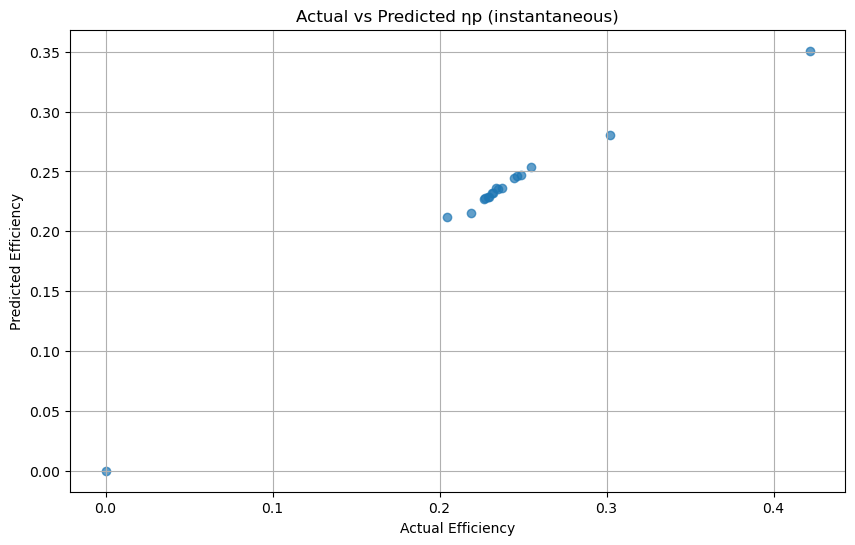

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("Actual vs Predicted ηp (instantaneous)")
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.0062
MSE: 0.0003
RMSE: 0.0176
R² Score: 0.9426


# Turning it into a TFlite model.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## WHY TFLITE?
### TensorFlow is an open-source machine learning and deep learning library developed by Google.It is widely used to build, train, and deploy machine learning (ML) and deep learning (DL) models in a fast, scalable, and flexible way.

In [33]:
def Build_model():
    model = keras.Sequential([
        layers.Dense(64,activation="relu",input_shape=[len(X_train.keys())]),
        layers.Dense(64,activation="relu",),
        layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model

In [34]:
model = Build_model()
model.summary()

/opt/anaconda3/envs/namaste/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
EPOCHS = 1000
history = model.fit(
    X_train_scaled,y_train,epochs=EPOCHS)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0420 - mae: 0.1687 - mse: 0.0420  
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mae: 0.0596 - mse: 0.0065
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mae: 0.0436 - mse: 0.0032
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - mae: 0.0713 - mse: 0.0082
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - mae: 0.0424 - mse: 0.0039
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mae: 0.0560 - mse: 0.0083 
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mae: 0.0532 - mse: 0.0052
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0264 - mse: 0.0012
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - mae: 0.0353 - mse: 0.0035
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - mae: 0.0527 - mse: 0.0042
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 

In [36]:
test_pred = model.predict(X_test_scaled).flatten()
test_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([0.23436275, 0.22588517, 0.23297112, 0.46223095, 0.2572774 ,
       0.23988813, 0.25477034, 0.29954687, 0.23570594, 0.23276198,
       0.22994253, 0.23032302, 0.25129914, 0.23850328, 0.23052216,
       0.23478745, 0.00687871, 0.22975618], dtype=float32)

In [37]:
y_test

75    0.229343
0     0.204741
70    0.227452
22    0.421880
12    0.255024
56    0.244804
10    0.248821
18    0.301881
4     0.218958
67    0.231714
61    0.233858
64    0.235283
53    0.246132
73    0.226676
62    0.237145
66    0.232114
33    0.000000
78    0.228953
Name: ηp (instantaneous), dtype: float64

### Conversion

In [38]:
keras_file = "Pump_pred.h5"
tf.keras.models.save_model(model,keras_file)
convertor = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = convertor.convert()
open("Pump_pred.tflite",'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /var/folders/2q/3y571xc90y9bhgg0mndfp9s40000gn/T/tmpf_c0g_3v/assets


INFO:tensorflow:Assets written to: /var/folders/2q/3y571xc90y9bhgg0mndfp9s40000gn/T/tmpf_c0g_3v/assets


Saved artifact at '/var/folders/2q/3y571xc90y9bhgg0mndfp9s40000gn/T/tmpf_c0g_3v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  12985873232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985875728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985873424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985875920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985873616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985873040: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1748229725.450137  152795 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748229725.450340  152795 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-26 08:52:05.451669: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/2q/3y571xc90y9bhgg0mndfp9s40000gn/T/tmpf_c0g_3v
2025-05-26 08:52:05.451946: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-26 08:52:05.451953: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/2q/3y571xc90y9bhgg0mndfp9s40000gn/T/tmpf_c0g_3v
I0000 00:00:1748229725.454218  152795 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-26 08:52:05.454506: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-26 08:52:05.468328: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

23136